## PART2 
## Question 2 (a,b,c,d)

### 2. Tree-Based Methods

#### (a) The dataset contains a training set and a test set. The training set contains 60,000 rows, of which 1,000 belong to the positive class and 171 columns, of which one is the class column. All attributes are numeric.

In [24]:
# load the data and packages
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve, RocCurveDisplay, accuracy_score



data_test = pd.read_csv('../data/aps_failure_test_set.csv', skiprows=19, sep=",", na_values=["na"])
data_train = pd.read_csv('../data/aps_failure_training_set.csv', skiprows=19, sep=",", na_values=["na"])
display(data_train)
display(data_test)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,NaN,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286,NaN,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292,NaN,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,NaN,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,NaN,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,NaN,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,neg,18,0.0,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,neg,79636,NaN,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,neg,110,NaN,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


#### (b) Data Preparation   
##### This data set has missing values. When the number of data with missing values is signiﬁcant, discarding them is not a good idea.

##### i. Research what types of techniques are usually used for dealing with data with missing values. Pick at least one of them and apply it to this data in the next steps.

using data imputation

In [22]:
# for saving time, if we can find knn_x_csv in the dir, we ignore the imputation.
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer, SimpleImputer, KNNImputer

data = data_train.append(data_test)

if os.path.isfile("knn_x.csv"):
    df_knn_x = pd.read_csv('knn_x.csv')
else:
    features_name = data_train.iloc[:,1:].columns.tolist()
    imp_knn = KNNImputer(missing_values=np.nan)
    data_knn_x = imp_knn.fit_transform(data.iloc[:,1:])
    df_knn_x = pd.DataFrame(data_knn_x, columns = features_name)
    df_knn_x.to_csv("knn_x.csv",index=0)
    

#### ii. For each of the 170 features, calculate the coeﬃcient of variation CV = s/v, where s is sample standard deviation and m is sample mean.

In [3]:
stats = df_knn_x.describe().T[["mean","std"]]
cv_data = (stats["std"]/stats["mean"]).sort_values(ascending=False)
display(cv_data)

cf_000    275.586127
co_000    274.953978
ad_000    274.694517
cs_009    194.711855
dj_000    129.764701
             ...    
bl_000      1.016995
bk_000      1.015714
cb_000      0.907361
ca_000      0.903602
cd_000      0.000000
Length: 170, dtype: float64

#### iii. Plot a correlation matrix for your features using pandas or any other tool.

In [4]:
corrmat = df_knn_x.corr()
display(corrmat)

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
aa_000,1.000000,0.046450,0.015452,-0.000800,0.026234,0.037718,0.011737,0.076570,0.195406,0.307954,...,0.415173,0.420975,0.410751,0.420855,0.426516,0.357998,0.260257,0.134078,0.008911,0.013902
ab_000,0.046450,1.000000,-0.007121,0.001024,0.021275,0.035973,0.000642,0.014696,0.041798,0.069935,...,0.085822,0.086033,0.074940,0.079853,0.069442,0.053717,0.033856,0.015782,0.038957,0.059416
ac_000,0.015452,-0.007121,1.000000,-0.001738,-0.003862,-0.008033,0.015700,0.001741,0.004365,0.005560,...,0.037078,0.035890,0.031321,0.031009,0.022810,0.019016,0.026664,0.022541,-0.003673,0.016196
ad_000,-0.000800,0.001024,-0.001738,1.000000,-0.000165,-0.000205,-0.000038,-0.000085,-0.000202,-0.000409,...,-0.001345,-0.001351,-0.001319,-0.001093,-0.001059,-0.000726,-0.001065,-0.000625,-0.000078,-0.000083
ae_000,0.026234,0.021275,-0.003862,-0.000165,1.000000,0.830840,-0.000486,-0.000831,0.002242,0.021828,...,0.013441,0.018962,0.012816,0.027806,0.067992,0.039843,-0.009044,-0.007526,0.063178,0.029818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ee_007,0.357998,0.053717,0.019016,-0.000726,0.039843,0.053458,0.007647,0.069152,0.184619,0.477640,...,0.442988,0.433788,0.420552,0.381487,0.544443,1.000000,0.227356,0.063185,-0.001257,0.000038
ee_008,0.260257,0.033856,0.026664,-0.001065,-0.009044,-0.011297,0.000097,0.005557,0.009559,0.021246,...,0.442885,0.470921,0.448768,0.394475,0.365701,0.227356,1.000000,0.690350,-0.005913,-0.002860
ee_009,0.134078,0.015782,0.022541,-0.000625,-0.007526,-0.009423,-0.001086,-0.003514,-0.009058,-0.018036,...,0.224908,0.236147,0.221093,0.184156,0.158627,0.063185,0.690350,1.000000,-0.003484,-0.001477
ef_000,0.008911,0.038957,-0.003673,-0.000078,0.063178,0.093454,0.000157,0.006972,0.015705,0.017921,...,0.004185,0.010372,0.003360,0.034880,0.005866,-0.001257,-0.005913,-0.003484,1.000000,0.228936


#### iv. Pick ⌊ √ 170 ⌋ features with highest CV , and make scatter plots and box plots for them, similar to those on p. 129 of ISLR. Can you draw conclusions about signiﬁcance of those features, just by the scatter plots? This does not mean that you will only use those features in the following questions. We picked them only for visualization.

#### Answer:
*The 13 features with high CV have high Volatility which means they are useful features to make prediction.*

In [5]:
# find the top 13 features.
pd.set_option('mode.chained_assignment', None)

cv_features_name = cv_data[:13].index.tolist()
data_b = df_knn_x[cv_features_name]

data_b["class"] = data["class"].values
display(data_b)

,cf_000,co_000,ad_000,cs_009,dj_000,as_000,df_000,dh_000,ag_000,au_000,az_009,ay_009,ch_000,class
0,2.0,220.0,280.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neg
1,1.2,169.6,262.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neg
2,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neg
3,2.0,2.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neg
4,0.0,202.0,458.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75995,2.0,42.0,892.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neg
75996,2.0,0.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neg
75997,2.0,378.0,1518.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neg
75998,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neg


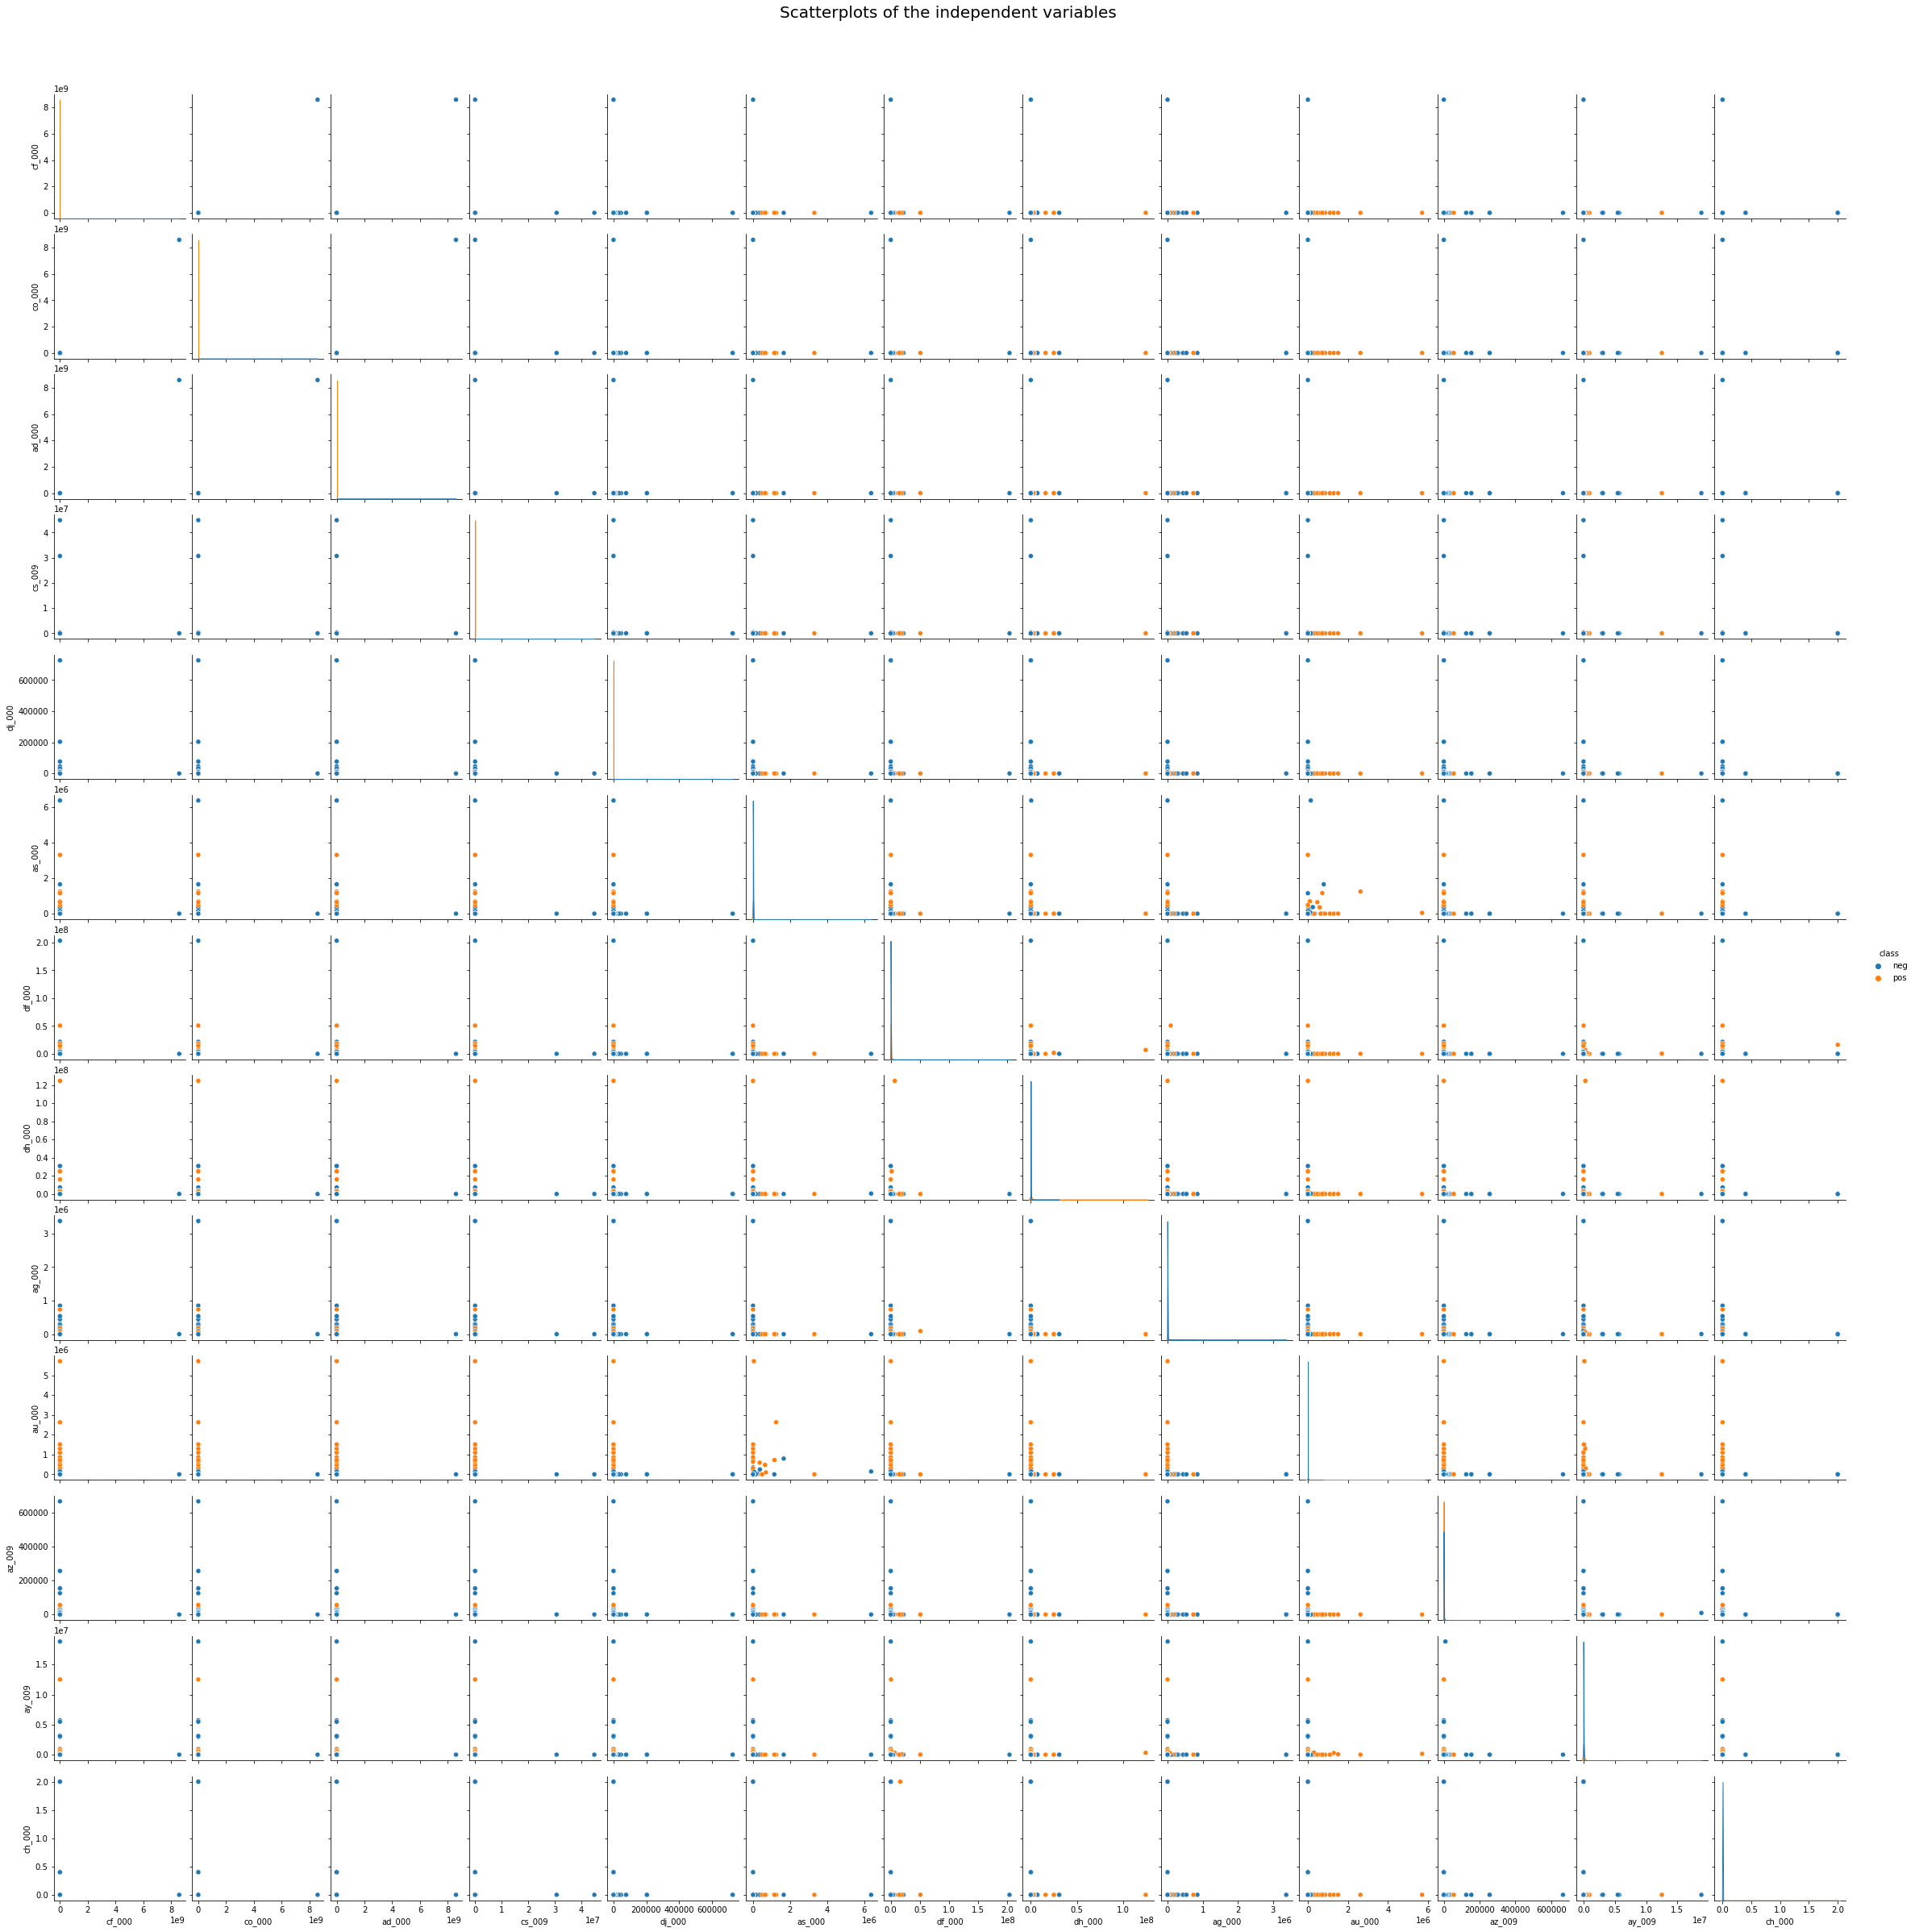

In [21]:
# scatter plots
g1 = sns.pairplot(
    data=data_b, hue="class",
    kind="scatter", diag_kind="kde"
)
g1.fig.suptitle("Scatterplots of the independent variables", y=1.03, fontsize=20)
plt.show()

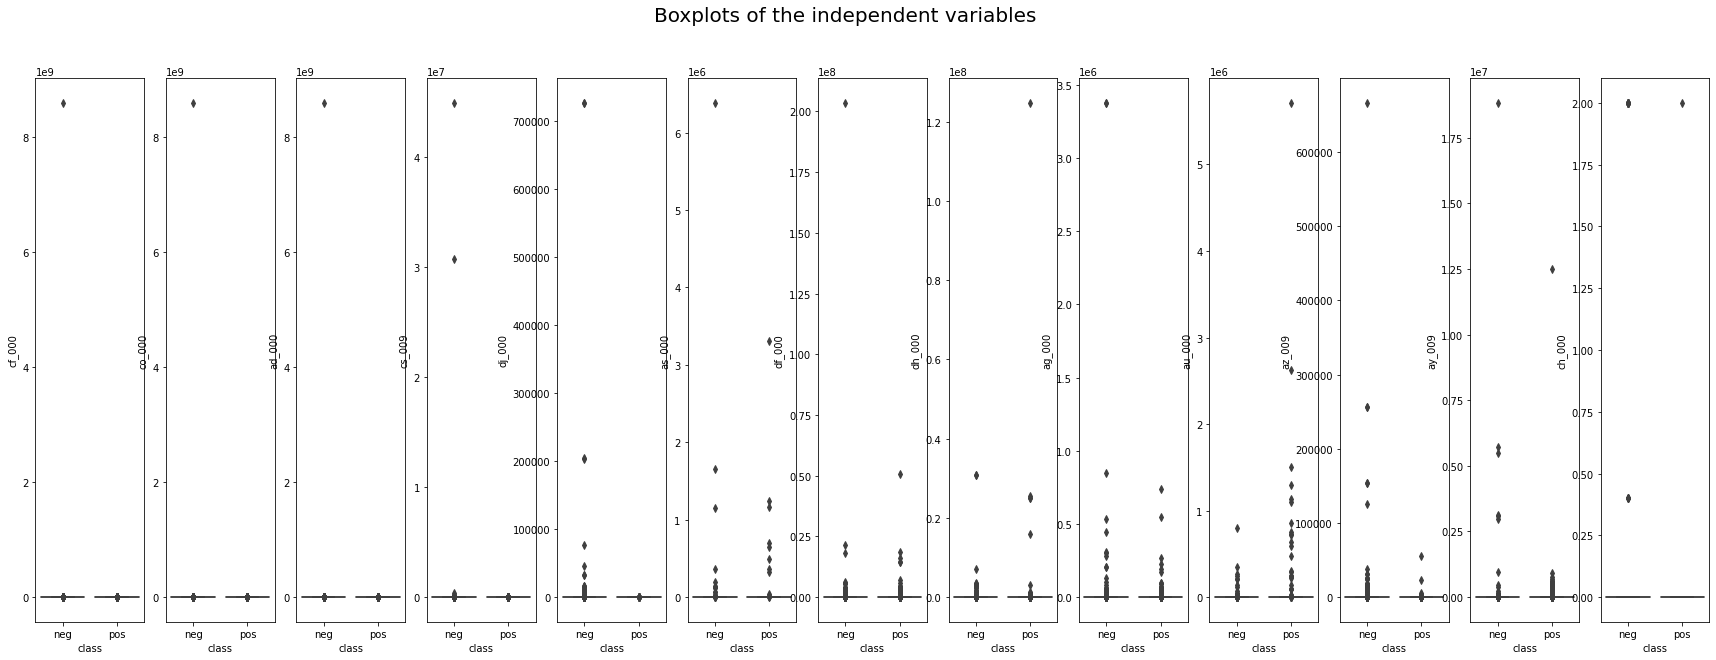

In [6]:
# box plots
fig, ax =plt.subplots(1,13, figsize=(30,10))
fig.suptitle('Boxplots of the independent variables', fontsize=20)

for name, order in zip(cv_features_name, range(13)):
    sns.boxplot(y=name, x="class",
                data=data_b, ax=ax[order]);

#### v. Determine the number of positive and negative data. Is this data set imbalanced?

Answer：

##### Yes, the data set is severely imbalanced. There are 1375 postive samples and 74625 negative sample.

In [7]:
data['class'].value_counts()

neg    74625
pos     1375
Name: class, dtype: int64

#### (c) Train a random forest to classify the data set. Do NOT compensate for class imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and misclassiﬁcation for training and test sets and report them (You may use pROC package). Calculate Out of Bag error estimate for your random forset and compare it to the test error.

#### ANSWER:
#### The test error is 0.0075 and the Out of Bag error is 0.0062

In [23]:
y_train = data_train['class']
y_test = data_test['class']

knn_x_train = df_knn_x.iloc[0:60000,:]
knn_x_test = df_knn_x.iloc[60000:,:]

Train data result:


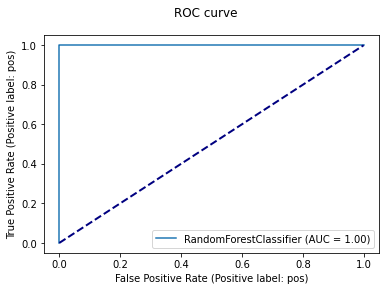

,predicted neg,predicted pos
neg,59000,0
pos,0,1000


AUC is 1.0, misclassiﬁcation is 0.0


Test data result:


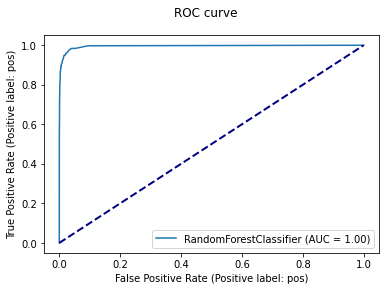

,predicted neg,predicted pos
neg,15610,15
pos,105,270


AUC is 0.9954532693333332, misclassiﬁcation is 0.007499999999999951
Out of Bag error is 0.006216666666666648


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
import warnings
warnings.filterwarnings("ignore")


rf_c = RandomForestClassifier(n_estimators=100, max_features="sqrt", n_jobs=-1, random_state=424, oob_score=True)
rf_c.fit(knn_x_train,y_train)

y_predict_c_train = rf_c.predict(knn_x_train)
y_predict_c_test = rf_c.predict(knn_x_test)


def evashow(rf, x, y_real, y_predict):
    my_confusion_matrix = confusion_matrix(y_real, y_predict)
    cm_df = pd.DataFrame(my_confusion_matrix, columns=["predicted neg","predicted pos"], index=["neg", "pos"])
    auc = roc_auc_score(y_real, rf.predict_proba(x)[:, 1])
    error = 1 - accuracy_score(y_real, y_predict)
    
    disp = RocCurveDisplay.from_estimator(rf, x, y_real)
    disp.figure_.suptitle("ROC curve")
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.show()
    
    return cm_df, auc, error
    

print("Train data result:")
c1,a1,e1= evashow(rf_c, knn_x_train, y_train, y_predict_c_train)
display(c1)
print('AUC is %s, misclassiﬁcation is %s' %(a1,e1))

print("\n")  

print("Test data result:")
c2,a2,e2= evashow(rf_c, knn_x_test, y_test, y_predict_c_test)
display(c2)
print('AUC is %s, misclassiﬁcation is %s' %(a2,e2))

print("Out of Bag error is", 1-rf_c.oob_score_)

#### (d) Research how class imbalance is addressed in random forests. Compensate for class imbalance in your random forest and repeat 2c. Compare the results with those of 2c.

#### Answer: 
##### If we did not adjust the parameters of tree model, overfitting may cause the result worse. So we first try to use oob_score find the best max_depth.
##### I choose auc and recall as estimators together. From the result table below, I choose depth as 4.
##### From the test confusion matrix in 2c and 2d, the False negative has decreased hugely from 105 to 9. The imbalance problem has been solved by preventing overftting and adjusting class weight.

In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import recall_score

le = LabelEncoder()
le.fit(["neg", "pos"])
y_train_con = le.transform(y_train)

d_list = [1,2,3,4,5,6]
oob_list = []
auc_list = []
recall_list = []
for d in d_list:
    rf_d_test = RandomForestClassifier(n_estimators=100, max_depth=d, max_features="sqrt", class_weight='balanced', n_jobs=-1, random_state=424, oob_score=True)
    rf_d_test.fit(knn_x_train,y_train)
    oob_list.append(rf_d_test.oob_score_)
    pred_train = rf_d_test.oob_decision_function_[:, 1]
    p2 = np.argmax(rf_d_test.oob_decision_function_,axis=1)
    auc_list.append(roc_auc_score(y_train, pred_train))
    recall_list.append(recall_score(y_train_con, p2))
    
df_d_test = pd.DataFrame({"max_depth":d_list, "oob score": oob_list, "auc":auc_list, "recall":recall_list})
df_d_test.set_index('max_depth',inplace=True)
display(df_d_test)

,oob score,auc,recall
max_depth,,,
1,0.932150,0.965685,0.925
2,0.936533,0.972235,0.945
3,0.942517,0.976591,0.947
4,0.949717,0.979721,0.949
5,0.956200,0.981403,0.942
6,0.962600,0.981126,0.931


Train data result:


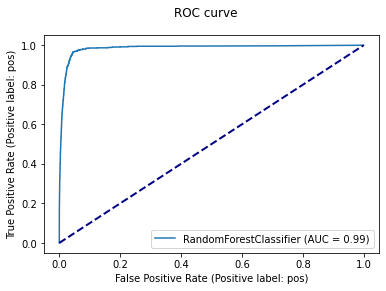

,predicted neg,predicted pos
neg,56049,2951
pos,32,968


AUC is 0.9851414322033898, misclassiﬁcation is 0.04971666666666663


Test data result:


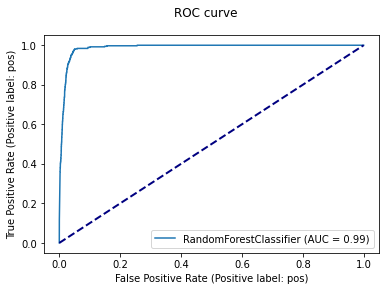

,predicted neg,predicted pos
neg,14864,761
pos,9,366


AUC is 0.9872651946666665, misclassiﬁcation is 0.04812499999999997
Out of Bag error is 0.05028333333333335


In [27]:
rf_d = RandomForestClassifier(n_estimators=100, max_depth=4, max_features="sqrt", class_weight='balanced', n_jobs=-1, random_state=424, oob_score=True)
rf_d.fit(knn_x_train,y_train)

y_predict_d_train = rf_d.predict(knn_x_train)
y_predict_d_test = rf_d.predict(knn_x_test)

print("Train data result:")
c1,a1,e1= evashow(rf_d, knn_x_train, y_train, y_predict_d_train)
display(c1)
print('AUC is %s, misclassiﬁcation is %s' %(a1,e1))

print("\n")  

print("Test data result:")
c2,a2,e2= evashow(rf_d, knn_x_test, y_test, y_predict_d_test)
display(c2)
print('AUC is %s, misclassiﬁcation is %s' %(a2,e2))

print("Out of Bag error is", 1-rf_d.oob_score_)